# Temporal coding is not only about cooperation - it is also about competition
T. Burwick, (SSCNS, vol.3)

In [1]:
import numpy as np
from numpy import pi, sqrt, exp, sin, cos, arctan, tanh
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [2]:
def g(u):
    return (1+tanh(u))/2

In [6]:
def f(t, X, N, tau, H, e, I, phi, alpha, beta, w0, w1, gamma, chi):
    u = X[:N]
    theta = X[N:]
    
    #intermediate
    V = g(u)
    diff = theta - theta.repeat(N).reshape(N,-1)
    C = H*(alpha+beta*cos(diff+phi))
    S = H*gamma*sin(diff+chi)
    
    du = (-u+I+C.dot(V))/(tau*(1-V+e))
    dtheta = w0 + w1*V + (S.dot(V))/tau
    return np.hstack([du, dtheta])

In [26]:
N = 30
P = 6
lamb_p = 1/P
alpha = 8
sigma = 2*pi
tau_w2 = 2*pi
tau = 1
w0 = 0
w1 = 0
e = 0.01
I = 0

chi = arctan(tau_w2/sigma)
gamma = sqrt(sigma**2 + tau_w2**2)
beta = gamma/2
phi = chi
w2 = tau_w2/tau

In [8]:
O = np.zeros((P,P), dtype=int)
O[0] = [15, 4, 1, 3, 1, 2]
O[1,1:] = [10, 0, 2, 1, 0]
O[2,2:] = [5, 0, 1, 0]
O[3,3:] = [4, 0, 0]
O[4,4:] = [4, 0]
O[5,5:] = [4]
l_idx = np.tril_indices(P)
O[l_idx] = O.T[l_idx]

In [9]:
X = np.zeros((N,P), dtype=int)
X[:15,0] = 1

X[:4,1] = 1
X[15:21,1] = 1

X[21:25,2] = 1
X[4:5,2] = 1

#X[25:26,3] = 1
#X[0:2,3] = 1
#X[5:6,3] = 1
X[0:1,3] = 1
X[5:7,3] = 1
X[16:17,3] = 1

X[26:28,4] = 1
X[4:5,4] = 1
X[15:16,4] = 1

X[28:30,5] = 1
X[7:9,5] = 1

In [10]:
D = np.diag(np.repeat(lamb_p,P))
H = X.dot(D).dot(X.T)

In [86]:
def routine(N, tau, H, e, I, phi, alpha, beta, w0, w1, gamma, chi):
    y0 = np.zeros(N*2)
    y0[:N] = 0.01*np.random.rand(N)
    y0[N:] = 2*pi*np.random.rand(N)
    soln = solve_ivp(lambda t, X: f(t, X, N, tau, H, e, I, phi, alpha, beta, w0, w1, gamma, chi),
                     [0,3],
                     y0, 'LSODA')
    t = soln.t
    u = soln.y[:N]
    theta = soln.y[N:]
    V = g(u)
    Np = X.sum(0)
    A = X.T.dot(V)/Np.reshape(-1,1)
    Z = X.T.dot(V*exp(1.j*theta))/X.T.dot(V)
    C = abs(Z)
    psi = np.unwrap(np.angle(Z))
    return t, A, C, psi

In [94]:
def plot_routine(t, A, C, psi):
    plt.figure(figsize=(9,12))
    for i in range(6):
        ax = plt.subplot(4, 3, i+1, polar=True)
        ax.plot(psi[i],A[i]*C[i])
        ax.set_ylim([0,1])
        ax = plt.subplot(4, 3, i+7)
        ax.plot(t,A[i]*C[i])
        ax.set_xlim([0,3])

    plt.tight_layout()
    plt.show()

In [95]:
def plot_freq(t, psi, w2, lamb_p, O, i):
    dPsi = np.diff(psi[i])/np.diff(t)
    Omega = w2*lamb_p*O[i,i]
    plt.plot(t[:-1],dPsi)
    plt.axhline(Omega,ls='--',color='k')
    plt.xlim([0,3])
    plt.show()

## Example 2

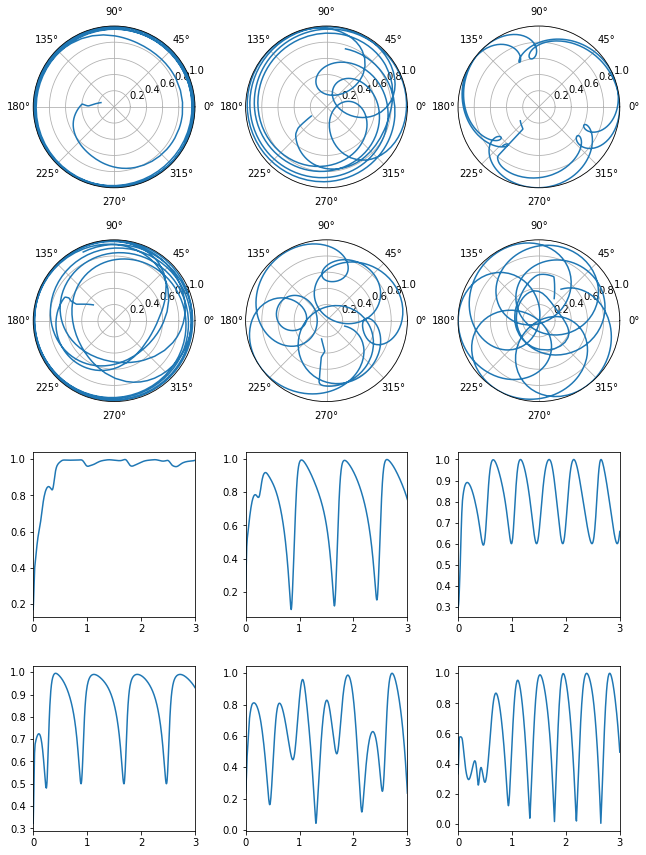

In [97]:
I = 0
t, A, C, psi = routine(N, tau, H, e, I, phi, alpha, beta, w0, w1, gamma, chi)
plot_routine(t, A, C, psi)

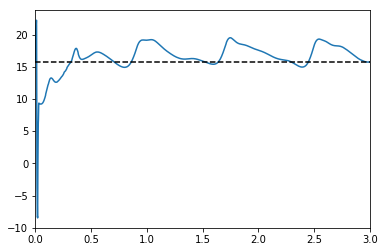

In [98]:
plot_freq(t, psi, w2, lamb_p, O, 0)

## Example 3

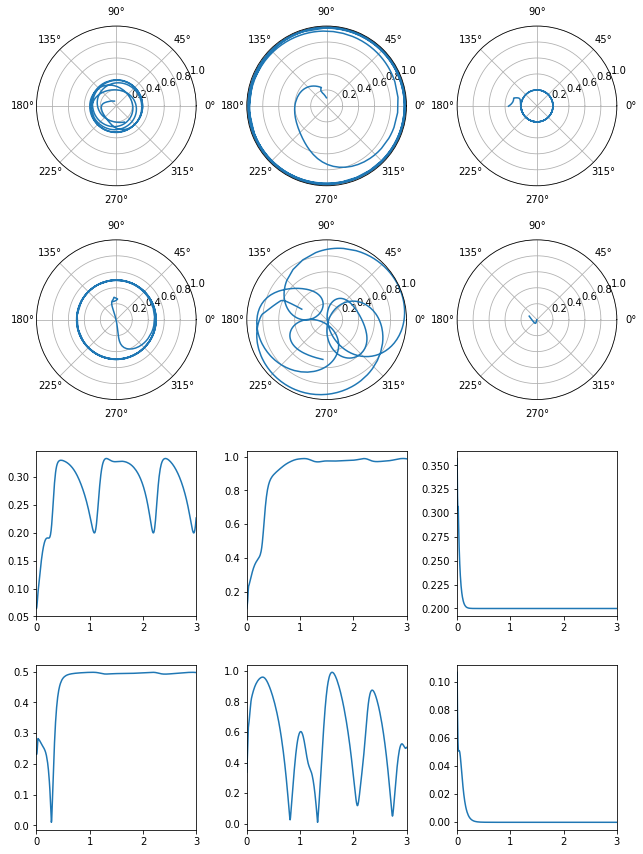

In [99]:
I = np.zeros(N)
idx = np.logical_and.reduce((np.logical_or.reduce((X[:,0]==1, X[:,2]==1, X[:,3]==1, X[:,5]==1)), X[:,1]==0, X[:,4]==0))
I[idx] = -20
t, A, C, psi = routine(N, tau, H, e, I, phi, alpha, beta, w0, w1, gamma, chi)
plot_routine(t, A, C, psi)

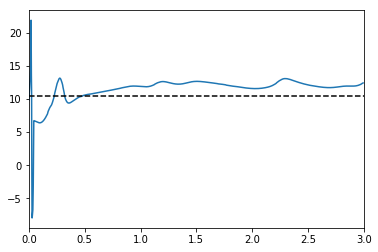

In [101]:
plot_freq(t, psi, w2, lamb_p, O, 1)